In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline

df = pd.read_csv('ORIGINAL.movie_first')

In [2]:
df = df.drop(columns=['Unnamed: 0'])

In [3]:
df.corr()

,index,FILM_runtime,FILM_oscars_won,FILM_budget,FILM_domestic_gross,FILM_worldwide_gross,FILM_mpaa_rating,BWAY_total_weekly_gross,BWAY_total_potential_gross,BWAY_total_performances,BWAY_total_previews,BWAY_avg_ticket_price,BWAY_avg_capacity,BWAY_avg_top_ticket_price,BWAY_avg_seats_in_theatre,FILM_mpaa_rating_number
index,1.000000,-0.210225,-0.131222,-0.241210,-0.197717,-0.214970,0.038512,-0.347167,-0.352186,-0.361570,-0.226786,-0.202153,-0.219909,-0.092234,-0.315347,0.038512
FILM_runtime,-0.210225,1.000000,0.196133,0.064299,0.026674,0.005286,0.204472,0.175160,0.171128,0.169370,0.167377,0.199733,0.192067,0.081449,0.118883,0.204472
FILM_oscars_won,-0.131222,0.196133,1.000000,0.092086,0.018388,0.028374,0.141426,0.116054,0.115982,0.129836,0.187380,0.096247,0.123858,0.004504,0.112710,0.141426
FILM_budget,-0.241210,0.064299,0.092086,1.000000,0.641420,0.743414,0.139018,0.560926,0.536104,0.445341,0.006429,0.159537,0.137662,0.072807,0.178509,0.139018
FILM_domestic_gross,-0.197717,0.026674,0.018388,0.641420,1.000000,0.896139,-0.091242,0.426101,0.425567,0.293930,0.042278,0.115131,0.098026,-0.004333,0.174006,-0.091242
FILM_worldwide_gross,-0.214970,0.005286,0.028374,0.743414,0.896139,1.000000,-0.018909,0.524690,0.510991,0.372089,0.015942,0.131261,0.130324,0.022430,0.154330,-0.018909
FILM_mpaa_rating,0.038512,0.204472,0.141426,0.139018,-0.091242,-0.018909,1.000000,0.153650,0.165290,0.153216,-0.083803,0.210334,0.127654,0.177359,0.064852,1.000000
BWAY_total_weekly_gross,-0.347167,0.175160,0.116054,0.560926,0.426101,0.524690,0.153650,1.000000,0.980157,0.901254,0.085077,0.293630,0.242150,0.140894,0.279355,0.153650
BWAY_total_potential_gross,-0.352186,0.171128,0.115982,0.536104,0.425567,0.510991,0.165290,0.980157,1.000000,0.885542,0.101733,0.317499,0.232892,0.147820,0.284620,0.165290
BWAY_total_performances,-0.361570,0.169370,0.129836,0.445341,0.293930,0.372089,0.153216,0.901254,0.885542,1.000000,0.090563,0.165661,0.218768,0.038374,0.259910,0.153216


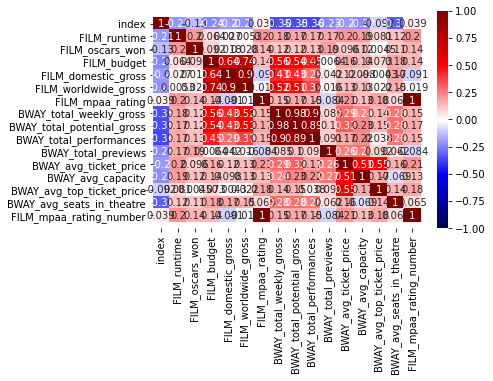

In [4]:
# example of a better corr matrix
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(df.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off

# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

<h3>BROADWAY TO FILM 

In [6]:
lr = LinearRegression()

In [54]:
X = df[['BWAY_total_weekly_gross',
       'BWAY_total_potential_gross', 'BWAY_total_performances',
       'BWAY_total_previews', 'BWAY_avg_ticket_price',
       'BWAY_avg_capacity', 'BWAY_avg_top_ticket_price',
       'BWAY_avg_seats_in_theatre']]

In [55]:
y = df['FILM_domestic_gross']

In [56]:
lr.fit(X,y)

LinearRegression(fit_intercept=False)

In [57]:
lr.score(X,y)

0.21958475797120347

In [58]:
lr.coef_

array([ 2.26059670e-01,  1.12787316e-01, -2.37893117e+04,  6.04698879e+04,
       -1.96837799e+05,  6.10722851e+07, -3.15056123e+04,  2.74809372e+04])

<h3>FILM TO BROADWAY

In [3]:
# Film budget out

newX = df[['FILM_runtime', 'FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating_number', 'FILM_runtime']]
newy = df['BWAY_total_weekly_gross']

In [60]:
lr.fit(newX, newy)

LinearRegression(fit_intercept=False)

In [61]:
lr.score(newX, newy)

0.3470031067349616

In [62]:
lr.intercept_

0.0

In [63]:
lr.coef_

array([-5.82511687e+04,  1.76419154e+00,  5.62311137e+06, -6.77600719e-01,
        4.65051140e-01,  5.07741718e+06, -5.82511687e+04])

In [8]:
newX = df[['FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating_number', 'FILM_runtime']]
newy = df['BWAY_total_weekly_gross']

In [9]:
lr.fit(newX, newy)

LinearRegression()

In [10]:
lr.score(newX, newy)

0.04816356035474578

In [7]:
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures()
X_poly = p.fit_transform(newX)

lr_full = LinearRegression()
lr_full.fit(X_poly, newy)
lr_full.score(X_poly, newy)

0.1352569632348446

In [94]:
lr.coef_

array([ 1.81467548e+00,  3.91164822e+06, -4.34362382e-01,  4.08719476e-01,
        5.29017701e+06,  6.40928691e+05])

In [ ]:
import fancyimpute  
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer 
# Getting only the float columns
floats = df[['domestic_total_gross', 'worldwide_total_gross', 'opening_weekend_rev', 'budget',
                                  'runtime_minutes', 'IMDb_rating']]
MICE = IterativeImputer()
floats = MICE.fit_transform(floats)
floats = pd.DataFrame(floats, columns = ['domestic_total_gross', 'worldwide_total_gross', 
                                         'opening_weekend_rev', 'budget', 'runtime_minutes', 
                                         'IMDb_rating']).set_index(movies_and_sequels_info.index)
floats

In [11]:
df

,Unnamed: 0,Unnamed: 0.1,index,title,FILM_runtime,FILM_stars,FILM_directors,FILM_aka,FILM_oscars_won,FILM_genres,...,BWAY_total_potential_gross,BWAY_total_performances,BWAY_total_previews,BWAY_last_performance,BWAY_avg_ticket_price,BWAY_avg_capacity,BWAY_avg_top_ticket_price,BWAY_avg_seats_in_theatre,FILM_mpaa_rating_number,FILM_release_year
0,2,2,71,Grease,110.000000,"['John Travolta', 'Olivia Newton-John', 'Stock...",['Randal Kleiser'],Grease,1.0,"['Musical', 'Romance']",...,75236934.0,2059,51,1994-04-24,59.158427,0.863382,138.586124,1082.404494,2,1978-01-01
1,5,5,85,Charlie and the Chocolate Factory,115.000000,"['Johnny Depp', 'Freddie Highmore', 'David Kel...",['Tim Burton'],Charlie and the Chocolate Factory: The IMAX Ex...,1.0,"['Adventure', 'Comedy', 'Family', 'Fantasy', '...",...,57710896.0,305,27,2017-04-02,99.095714,0.879214,233.000000,1496.000000,2,2005-01-01
2,8,8,395,Guys and Dolls,150.000000,"['Marlon Brando', 'Jean Simmons', 'Frank Sinat...",['Joseph L. Mankiewicz'],Guys and Dolls,4.0,"['Comedy', 'Crime', 'Musical', 'Romance']",...,18653313.0,1264,61,1992-03-22,52.343795,0.849979,275.000000,1273.861446,0,1955-01-01
3,10,10,402,The Sound of Music,172.000000,"['Julie Andrews', 'Christopher Plummer', 'Elea...",['Robert Wise'],Rodgers and Hammerstein's the Sound of Music,0.0,"['Biography', 'Drama', 'Family', 'Musical', 'R...",...,53138739.0,533,38,1998-02-08,53.843056,0.783207,75.069444,1435.750000,1,1965-01-01
4,11,11,403,Chitty Chitty Bang Bang,144.000000,"['Dick Van Dyke', 'Sally Ann Howes', 'Lionel J...",['Ken Hughes'],Chitty Chitty Bang Bang,1.0,"['Adventure', 'Family', 'Fantasy', 'Musical']",...,48791929.0,285,34,2005-03-27,63.858537,0.745973,115.884146,1806.926829,1,1968-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,536,578,27000,The Sound Inside,103.708633,Not found,['Dominic Allan'],Not found,0.0,"['director: {', '@type: Person', 'url: /name/n...",...,17243316.0,100,37,2019-09-15,86.498889,0.711578,275.000000,998.000000,0,1995-01-01
403,540,585,27011,Freestyle Love Supreme,103.708633,"['Utkarsh Ambudkar', 'Lin-Manuel Miranda', 'Ch...",['Ryan McFaul'],Not found,0.0,"['actor: [', '{', '@type: Person', 'url: /name...",...,16132960.0,117,23,2019-09-15,136.997778,0.906589,302.555556,765.000000,0,2014-01-01
404,541,586,27012,The Will Rogers Follies,103.708633,"['Keith Carradine', 'Dee Hoty', 'Roxane Barlow']",['Walter C. Miller'],Not found,0.0,"['actor: [', '{', '@type: Person', 'url: /name...",...,0.0,981,33,1991-04-07,46.993543,0.781402,193.888814,1460.511811,0,1991-01-01
405,543,588,27014,Lord of the Dance: Dangerous Games,103.000000,"['James Keegan', 'Thomas Cunningham', 'Carolin...",['Paul Dugdale'],Lord of the Dance: Veszélyes játékok,0.0,"['contentRating: Not Rated', 'actor: [', '{', ...",...,11657834.0,58,4,2015-11-08,60.232500,0.438525,225.000000,1896.000000,0,2014-01-01


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(newX, newy, test_size = 1/3)

In [69]:
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
lr.score(x_train, y_train)

0.16213492702325427

In [72]:
y_pred = lr.predict(x_test)

In [80]:
y_train.shape

(364,)

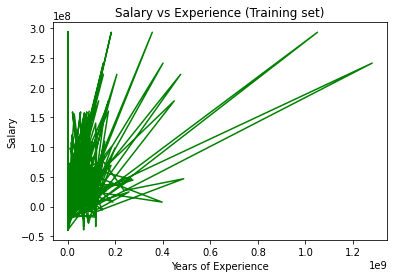

In [84]:
#plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [40]:
lr.coef_

array([ 3.20464345e+05,  1.81467548e+00,  3.91164822e+06, -4.34362383e-01,
        4.08719475e-01,  5.29017701e+06,  3.20464345e+05])

In [5]:
df[['FILM_runtime', 'FILM_budget', 'FILM_oscars_won', 'FILM_domestic_gross', 'FILM_worldwide_gross',
          'FILM_mpaa_rating_number', 'FILM_runtime', 'BWAY_total_weekly_gross']]

,FILM_runtime,FILM_budget,FILM_oscars_won,FILM_domestic_gross,FILM_worldwide_gross,FILM_mpaa_rating_number,FILM_runtime,BWAY_total_weekly_gross
0,129.000000,1.600000e+08,2.0,5.044812e+08,1.264064e+09,2,129.000000,4.291585e+08
1,160.000000,1.870291e+07,0.0,6.669267e+07,1.174601e+08,3,160.000000,6.453351e+08
2,110.000000,6.000000e+06,1.0,1.900711e+08,3.972175e+08,2,110.000000,1.198180e+08
3,118.000000,2.600000e+08,1.0,5.436380e+08,1.656964e+09,2,118.000000,1.677802e+09
4,103.708633,1.000000e+08,0.0,6.669267e+07,1.174601e+08,0,103.708633,1.113135e+08
...,...,...,...,...,...,...,...,...
542,100.000000,1.870291e+07,0.0,6.669267e+07,1.174601e+08,0,100.000000,1.331285e+06
543,103.000000,1.870291e+07,0.0,6.669267e+07,1.174601e+08,0,103.000000,3.118954e+06
544,45.000000,1.870291e+07,0.0,6.669267e+07,1.174601e+08,0,45.000000,1.395156e+07
545,88.000000,1.870291e+07,0.0,6.669267e+07,1.174601e+08,0,88.000000,8.837623e+06


In [8]:
small_df = df[['FILM_runtime', 'FILM_budget', 'FILM_domestic_gross', 'FILM_worldwide_gross', 'BWAY_total_weekly_gross']]



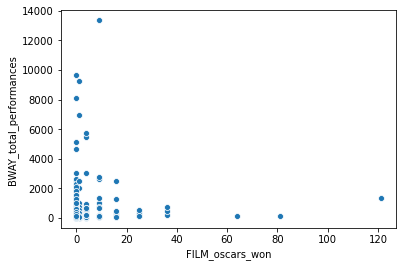

In [34]:
test_x = df['FILM_oscars_won']**2

sns.scatterplot(data=df, x=test_x, y='BWAY_total_performances')

In [ ]:
'FILM_runtime', 'FILM_budget', 'FILM_domestic_gross', 'FILM_worldwide_gross'

In [24]:
na_list = [['BWAY_total_weekly_gross'],
       'BWAY_total_potential_gross', 'BWAY_total_performances',
       'BWAY_total_previews', 'BWAY_avg_ticket_price',
       'BWAY_avg_capacity', 'BWAY_avg_top_ticket_price',
       'BWAY_avg_seats_in_theatre']

df.FILM_worldwide_gross = df.FILM_worldwide_gross.fillna(df.FILM_worldwide_gross.mean())

In [29]:
df.FILM_budget.unique()

array([nan])

In [ ]:
X = df[['BWAY_total_weekly_gross',
       'BWAY_total_potential_gross', 'BWAY_total_performances',
       'BWAY_total_previews', 'BWAY_avg_ticket_price',
       'BWAY_avg_capacity', 'BWAY_avg_top_ticket_price',
       'BWAY_avg_seats_in_theatre']]